# Exemplo de implementação de Redes Neurais em R

In [1]:
install.packages("neuralnet")

Installing neuralnet [1.44.2] ...
	OK [linked cache]


In [1]:
library("neuralnet")

In [2]:
install.packages("titanic")

Installing titanic [0.1.0] ...
	OK [linked cache]


In [3]:
library("titanic")

In [41]:
train <- titanic_train
test_fin <- titanic_test

In [5]:
head(train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [6]:
head(test)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q
2,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,,S
3,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,,Q
4,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,,S
5,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,,S
6,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,,S


In [9]:
library(Amelia)

Loading required package: Rcpp

## 
## Amelia II: Multiple Imputation
## (Version 1.7.6, built: 2019-11-24)
## Copyright (C) 2005-2020 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 



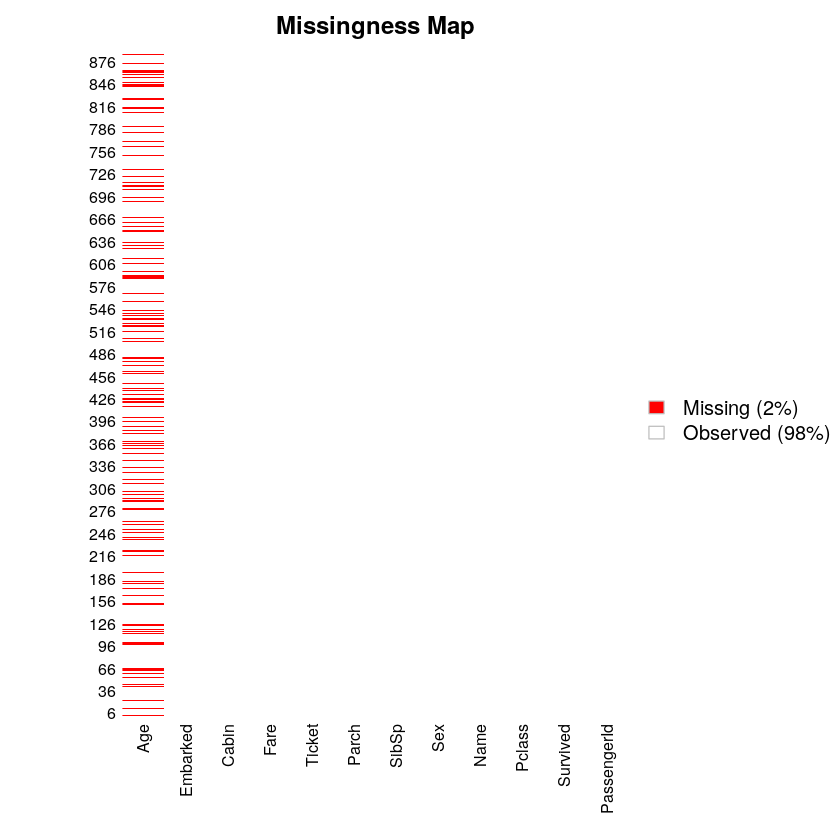

In [10]:
missmap(train, col=c("red", "white"))

In [12]:
install.packages("dplyr")

Retrieving 'https://cloud.r-project.org/src/contrib/magrittr_2.0.1.tar.gz' ...
	OK [downloaded 259.4 Kb in 0.2 secs]
Installing generics [0.1.0] ...
	OK [copied local binary]
Installing magrittr [2.0.1] ...
	OK [built from source]
Installing R6 [2.5.0] ...
	OK [copied local binary]
Installing pkgconfig [2.0.3] ...
	OK [copied local binary]
Installing tibble [3.0.4] ...
	OK [copied local binary]
Installing purrr [0.3.4] ...
	OK [copied local binary]
Installing tidyselect [1.1.0] ...
	OK [copied local binary]
Installing dplyr [1.0.2] ...
	OK [copied local binary]


In [14]:
library(dplyr)


Attaching package: ‘dplyr’


The following object is masked from ‘package:neuralnet’:

    compute


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [42]:
train = select(train, Survived, Pclass, Age, Sex, SibSp, Parch)

In [43]:
train = na.omit(train)

In [18]:
str(train)

'data.frame':	714 obs. of  6 variables:
 $ Survived: int  0 1 1 1 0 0 0 1 1 1 ...
 $ Pclass  : int  3 1 3 1 3 1 3 3 2 3 ...
 $ Age     : num  22 38 26 35 35 54 2 27 14 4 ...
 $ Sex     : chr  "male" "female" "female" "female" ...
 $ SibSp   : int  1 1 0 1 0 0 3 0 1 1 ...
 $ Parch   : int  0 0 0 0 0 0 1 2 0 1 ...
 - attr(*, "na.action")= 'omit' Named int [1:177] 6 18 20 27 29 30 32 33 37 43 ...
  ..- attr(*, "names")= chr [1:177] "6" "18" "20" "27" ...


In [52]:
train$Survived = factor(train$Survived)
train$Sex = factor(train$Sex)
train$Pclass = factor(train$Pclass, order=TRUE, levels=c(3, 2, 1))

In [27]:
install.packages("GGally")

Installing GGally [2.0.0] ...
	OK [linked cache]


In [22]:
library(GGally)

Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



Warning message in ggcorr(train, nbreaks = 6, label = TRUE, label_size = 3, color = "grey50"):
“data in column(s) 'Survived', 'Pclass', 'Sex' are not numeric and were ignored”


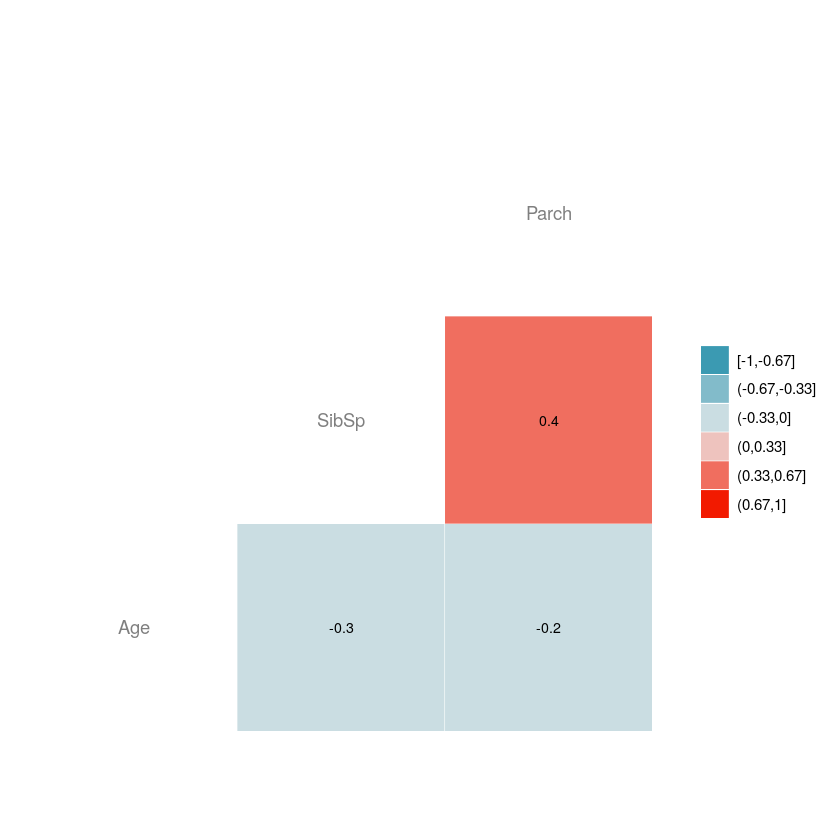

In [28]:
ggcorr(train, nbreaks = 6, label = TRUE, label_size = 3, color = "grey50")

In [45]:
train_test_split = function(data, fraction = 0.8, train = TRUE) {
  total_rows = nrow(data)
  train_rows = fraction * total_rows
  sample = 1:train_rows
  if (train == TRUE) {
    return (data[sample, ])
  } else {
    return (data[-sample, ])
  }
}

In [68]:
train_2 <- train_test_split(train, 0.8, train = TRUE)
test_2 <- train_test_split(train, 0.8, train = FALSE)

Scailing

In [75]:
head(train_2)

,Survived,Pclass,Age,Sex,SibSp,Parch
,<fct>,<ord>,"<dbl[,1]>",<fct>,"<dbl[,1]>","<dbl[,1]>"
1,0,3,-0.5545127,male,0.4895789,-0.5049451
2,1,1,0.5424457,female,0.4895789,-0.5049451
3,1,3,-0.2802731,female,-0.5613593,-0.5049451
4,1,1,0.3367660,female,0.4895789,-0.5049451
5,0,3,0.3367660,male,-0.5613593,-0.5049451
7,0,1,1.6394040,male,-0.5613593,-0.5049451


In [76]:
train_2$Age = scale(train_2$Age)
train_2$SibSp = scale(train_2$SibSp)
train_2$Parch = scale(train_2$Parch)

In [77]:
library(neuralnet)

In [119]:
X_NN = train_2[c('Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Survived')]

In [109]:
head(X_NN)

,Pclass,Age,Sex,SibSp,Parch,Survived
,<dbl>,"<dbl[,1]>",<dbl>,"<dbl[,1]>","<dbl[,1]>",<fct>
1,1,-0.5545127,2,0.4895789,-0.5049451,0
2,3,0.5424457,1,0.4895789,-0.5049451,1
3,1,-0.2802731,1,-0.5613593,-0.5049451,1
4,3,0.3367660,1,0.4895789,-0.5049451,1
5,1,0.3367660,2,-0.5613593,-0.5049451,0
7,3,1.6394040,2,-0.5613593,-0.5049451,0


In [106]:
train_2$Sex = as.numeric(train_2$Sex)
train_2$Pclass = as.numeric(train_2$Pclass)

In [123]:
NN = neuralnet(Survived ~ Pclass + Age + Sex + SibSp + Parch, X_NN, hidden = c(5, 3), linear.output = T)

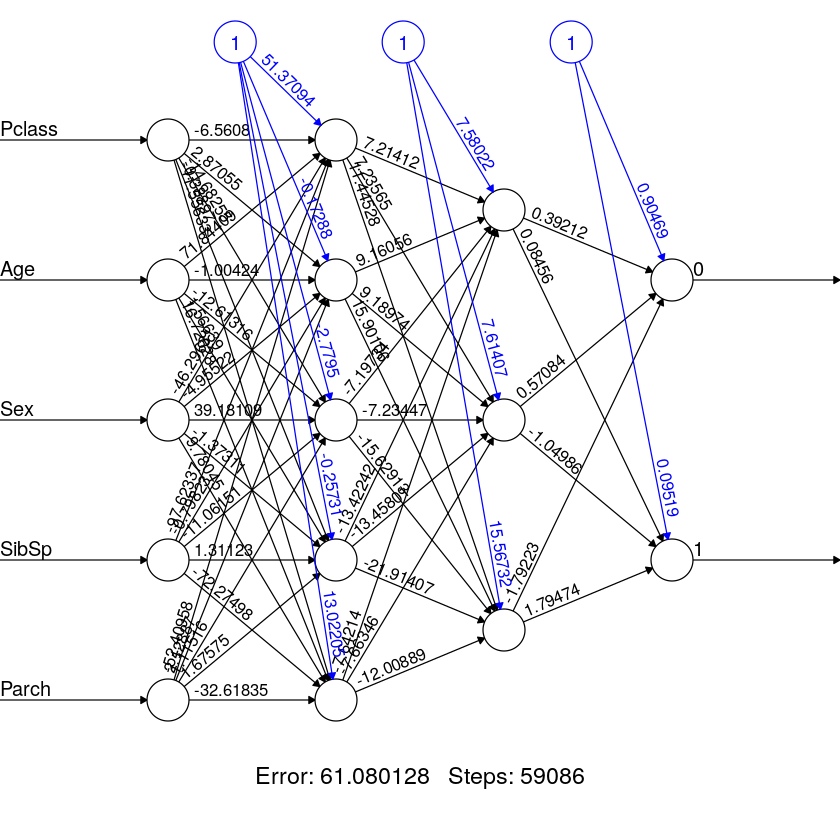

In [124]:
plot(NN, rep = 'best')